<a href="https://colab.research.google.com/github/rakelup/GDMR/blob/master/diabetes_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classifier

Ce programme crée un classificateur pour l'ensemble de données sur le diabète des Indiens Pima - https://www.kaggle.com/uciml/pima-indians-diabetes-database. C'est un problème de classification binaire (2 classes). 
Il y a 768 observations avec 8 variables d'entrée et 1 variable de sortie / cible. Les noms des variables sont les suivants:





- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Étape 1: importer les bibliothèques 

In [2]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42


### Étape 2: Lire les données, analyse exploratoire des données

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/',force_remount=True)
#df = pd.read_csv('diabetes.csv')

df = pd.read_csv("https://raw.githubusercontent.com/rakelup/GDMR/master/diabetes.csv", sep=",",error_bad_lines=False)
df.head()



Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [ ]:
# aperçu des données
print ('Files     : ', df.shape[0])
print ('Colonnes  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nValeurs manquantes:  ', df.isnull().sum().values.sum())
print ('\nValeurs unique :  \n', df.nunique())

Files     :  768
Colonnes  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Valeurs manquantes:   0

Valeurs unique :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Distribution de la variable cible')

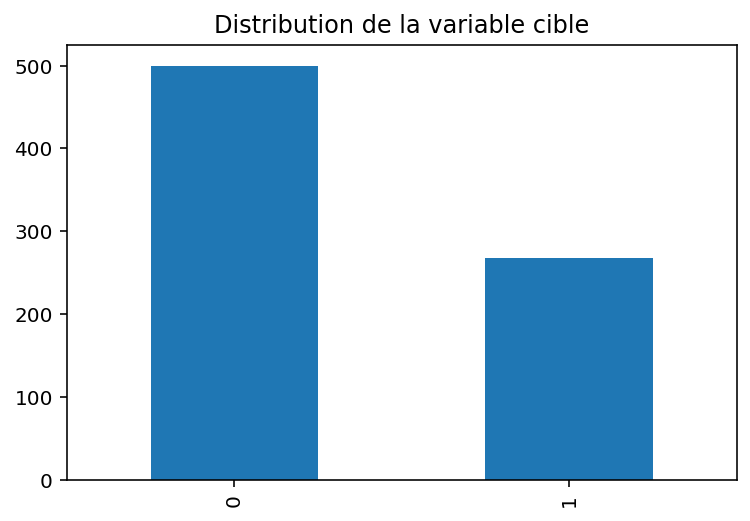

In [ ]:
# # La distribution de la classe cible est légèrement déséquilibrée 
# «0» = pas de diabète; «1» = diabète
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot(kind='bar').set_title('Distribution de la variable cible')





0    0.651042
1    0.348958
Name: Outcome, dtype: float64


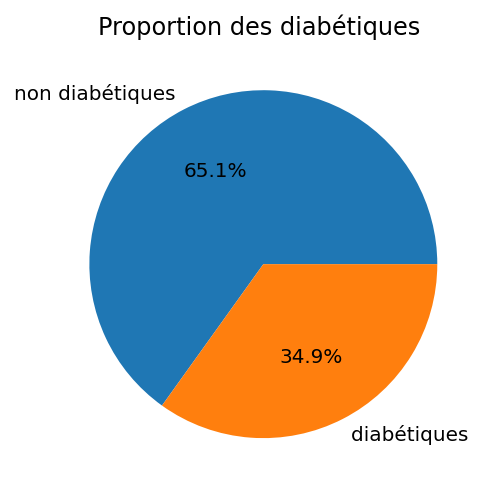

In [ ]:
proportion = df.Outcome.value_counts() / df.Outcome.count()
print (proportion)

label = ['non diabétiques', 'diabétiques ']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

plt.title('Proportion des diabétiques ')
labels=['non diabetes, diabetes']
plt.show()

# https://datatofish.com/pie-chart-matplotlib/

Text(0.5, 1.0, 'Distribution Age')

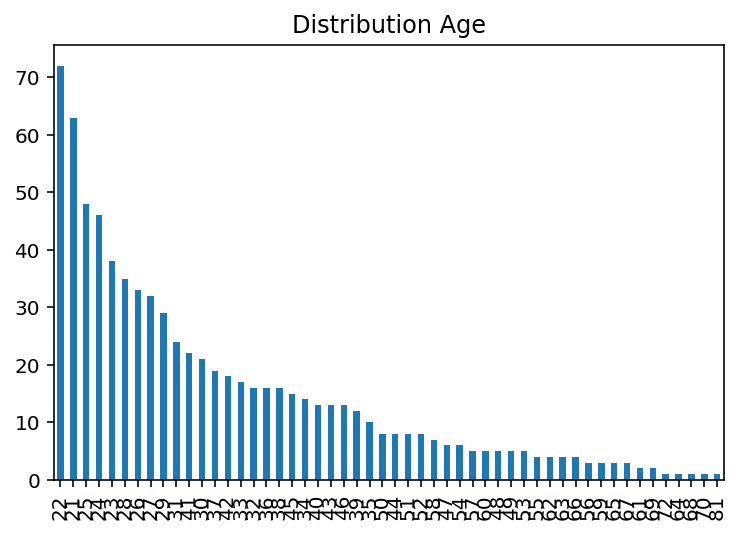

In [ ]:

df['Age'].value_counts().plot(kind='bar').set_title('Distribution Age')

Text(0.5, 1.0, 'Distribution grosseses')

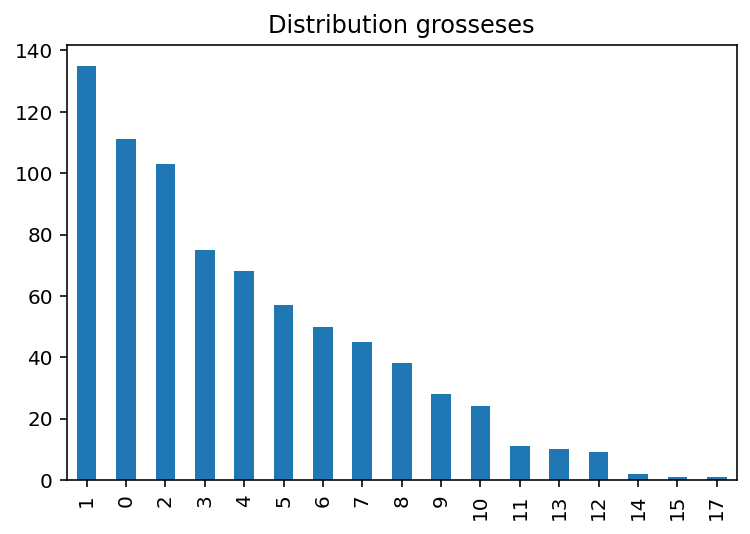

In [ ]:
df['Pregnancies'].value_counts().plot(kind='bar').set_title('Distribution grosseses')

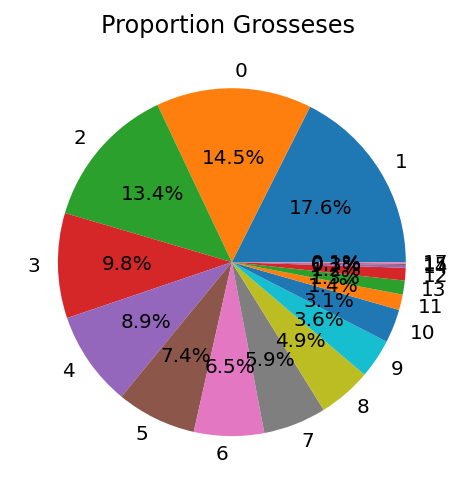

In [ ]:
proportionGrosseses = df.Pregnancies.value_counts() / df.Pregnancies.count()



plt.pie(proportionGrosseses,labels = proportionGrosseses.index,autopct='%1.1f%%')

plt.title('Proportion Grosseses ')

plt.show()

In [ ]:
# voir toutes les colonnes numériques
df.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

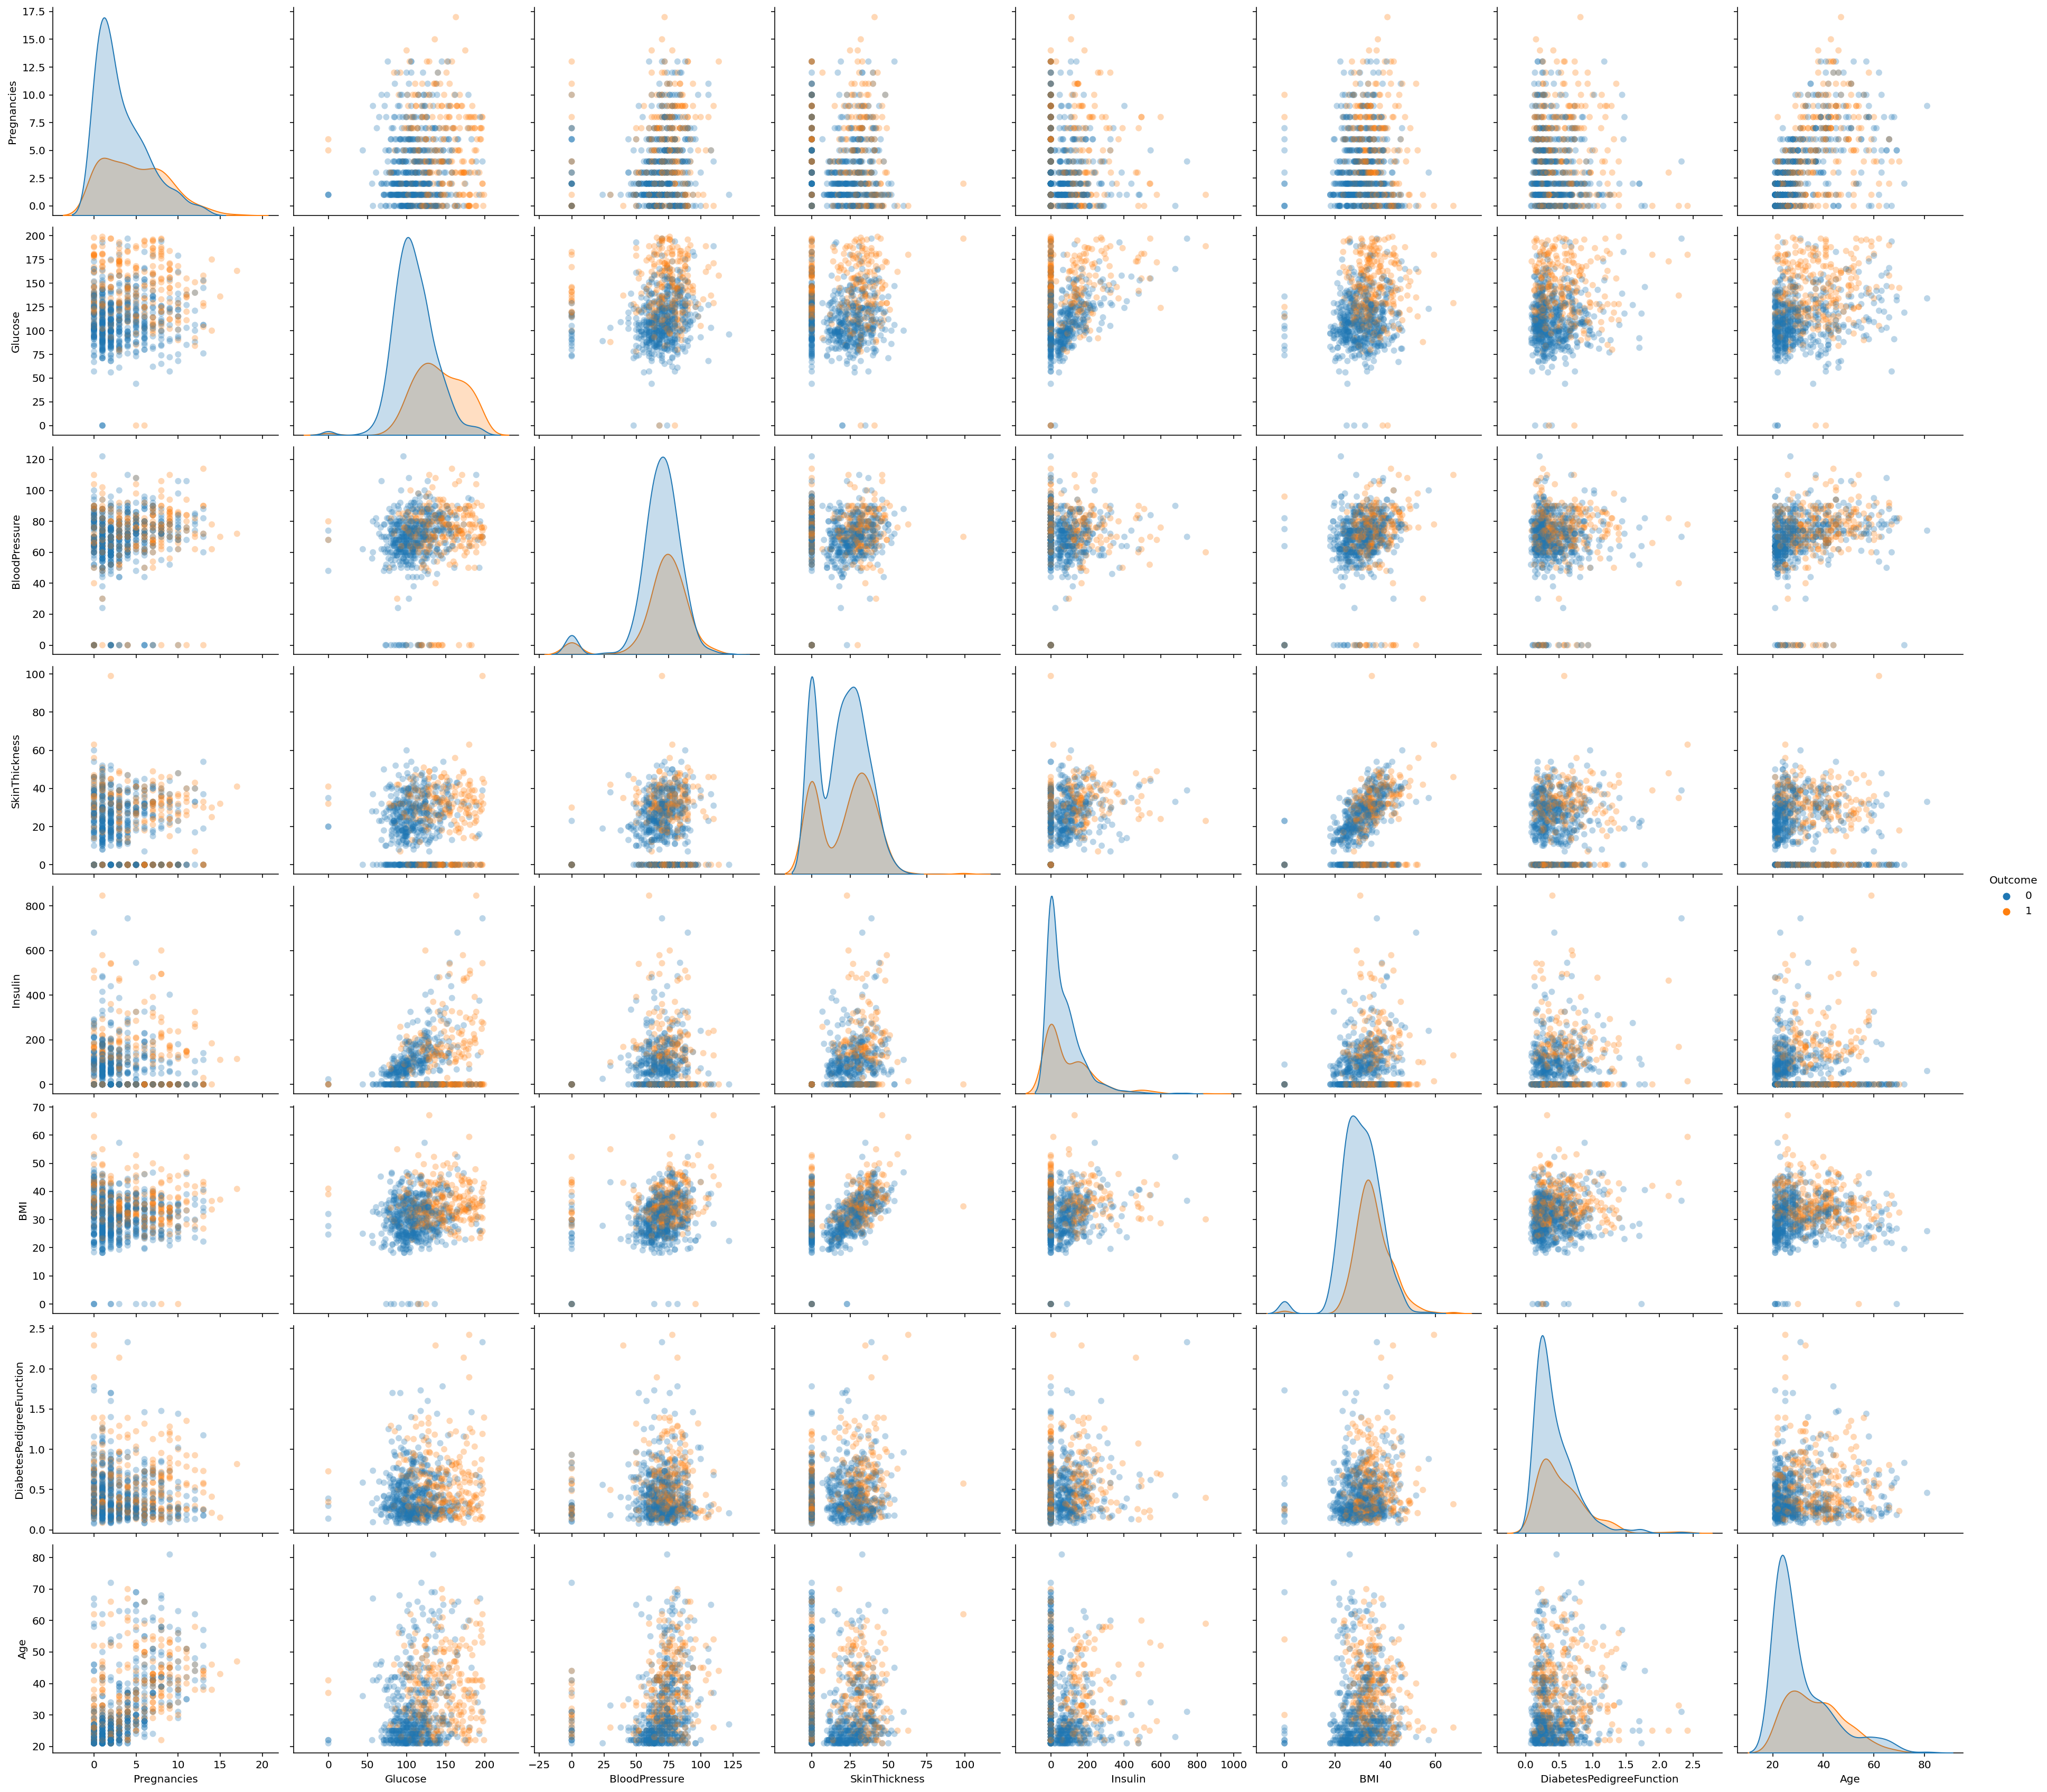

In [ ]:
# Visualization par pairs
sns.pairplot(df, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=3, aspect=1.1)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


(9.5, -0.5)

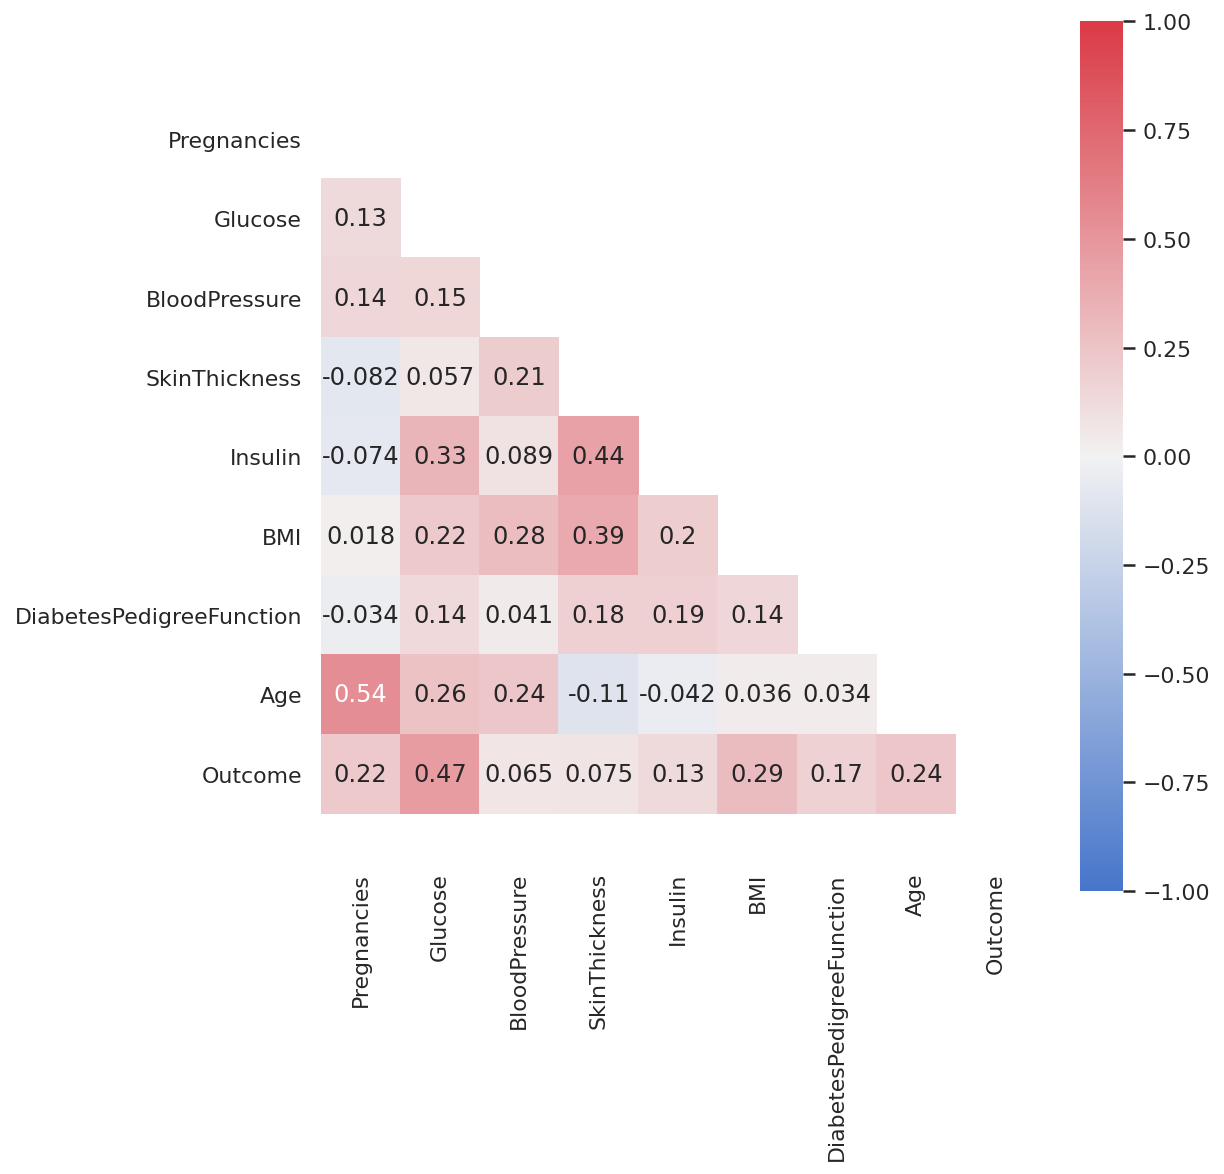

In [ ]:
# Calcule de la matrix de corrélation 
# https://datatofish.com/correlation-matrix-pandas/

correlation_matrix = df.corr()
print(correlation_matrix)

#Visualisation de la matrice de corrélation (Heatmap)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

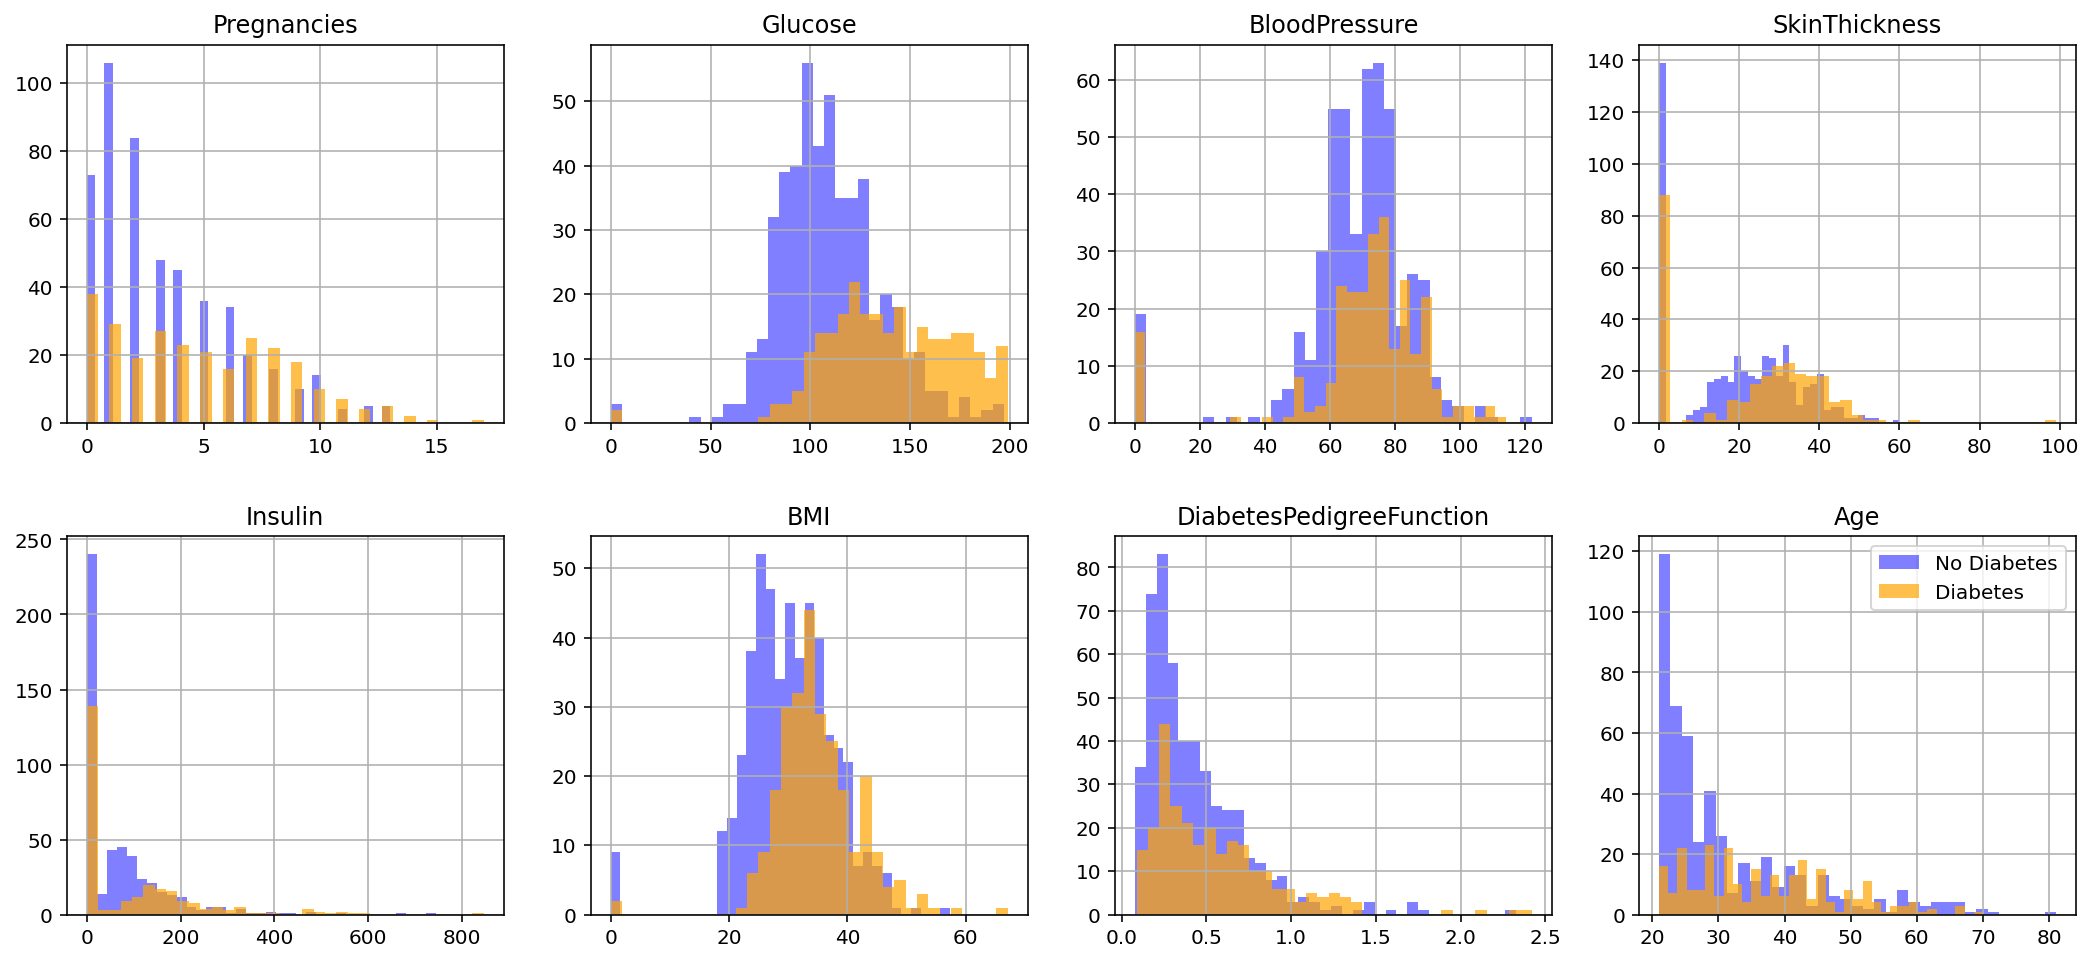

In [ ]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

In [ ]:
## TODO MOVER ESTO MAS ARRIBA

##Valeurs manquantes en Glucose, BloodPressure, SkinThickness, Insulin, BMI
#besoin de remplacer zéro par la médiane, 2 étapes: remplacez 0 par NaN, puis remplacez NaN par la médiane (pour que 0 n'affecte pas la médiane)
# après cette étape, réexécutez la visualisation précédente

df.Glucose.replace(0, np.nan, inplace=True)
df.Glucose.replace(np.nan, df['Glucose'].median(), inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].median(), inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].median(), inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].median(), inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.BMI.replace(np.nan, df['BMI'].median(), inplace=True)

In [ ]:
# to explore: how about trying to replace zero values with random sampling? 

In [ ]:
# to explore: there is 1 outlier in SkinThickness (value: 99.0)
# df['SkinThickness'].max()
# sorted(df['SkinThickness'])[::-1]  # descending

### Étape 3: Créez un ensemble de données d'entité X et cible y (X et y sont couramment utilisés dans sklearn)

In [4]:
X, y = df.drop('Outcome', axis=1), df['Outcome']
print(X.shape, y.shape)

# type(X)   # pandas.core.frame.DataFrame
# type(y)   # pandas.core.series.Series

(768, 8) (768,)


## Standardiser les données
Standardiser les donnée en supprimant la moyenne et en mettant à l'échelle la variance unitaire

Le score standard d'un échantillon x est calculé comme suit:

z = (x - u) / s

où u est la moyenne des échantillons d'apprentissage ou zéro si with_mean = False, et s est l'écart type des échantillons d'apprentissage ou un si with_std = False.

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)



X_scaled (768, 8)


##Selection des variables 

Use LassoCV to find the optimal ALPHA value for L1 regularization
X_scaled (768, 8)
LASSO best alpha:  0.008603464416684501
[('Glucose', 0.1880413802244648), ('BMI', 0.08931918266428746), ('Pregnancies', 0.06311584122142201), ('DiabetesPedigreeFunction', 0.036276542515315036), ('Age', 0.016956407714825757), ('BloodPressure', -0.0), ('SkinThickness', 0.0), ('Insulin', -0.0)]


Text(0.5, 1.0, 'Top Features derived by LassoCV')

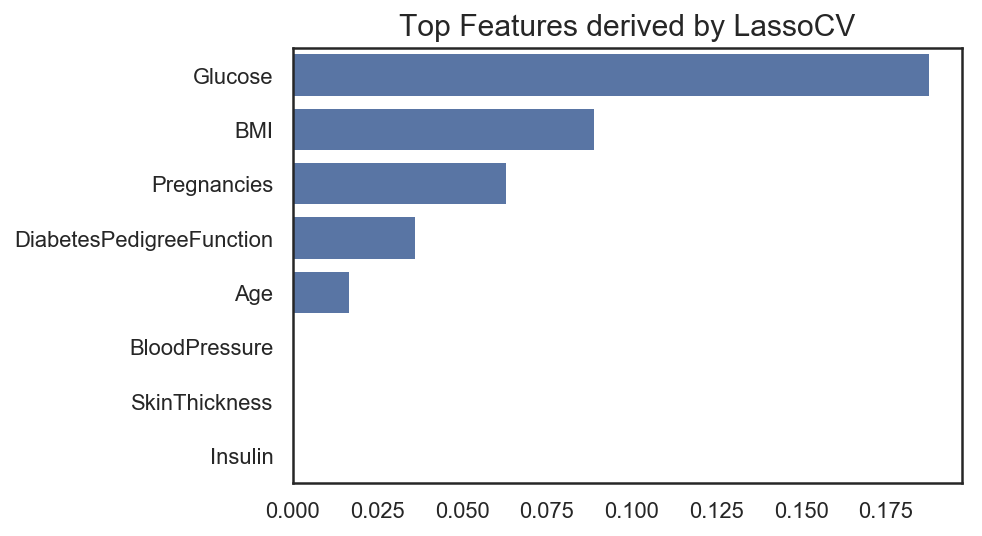

In [ ]:
## to find significant features using LassoCV (all X_scaled)
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

print('Use LassoCV to find the optimal ALPHA value for L1 regularization')
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_scaled, y)
# This is the best alpha value found
print('LASSO best alpha: ', lasso_model.alpha_ )

# display all coefficients in the model with optimal alpha
zipped = list(zip(X.columns, lasso_model.coef_)) 
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
print(zipped)
a,b = zip(*zipped)
sns.barplot(y=list(a), x=list(b), color='b')
plt.title('Top Features derived by LassoCV', size=15)

Text(0.5, 1.0, 'Top Features derived by Random Forest')

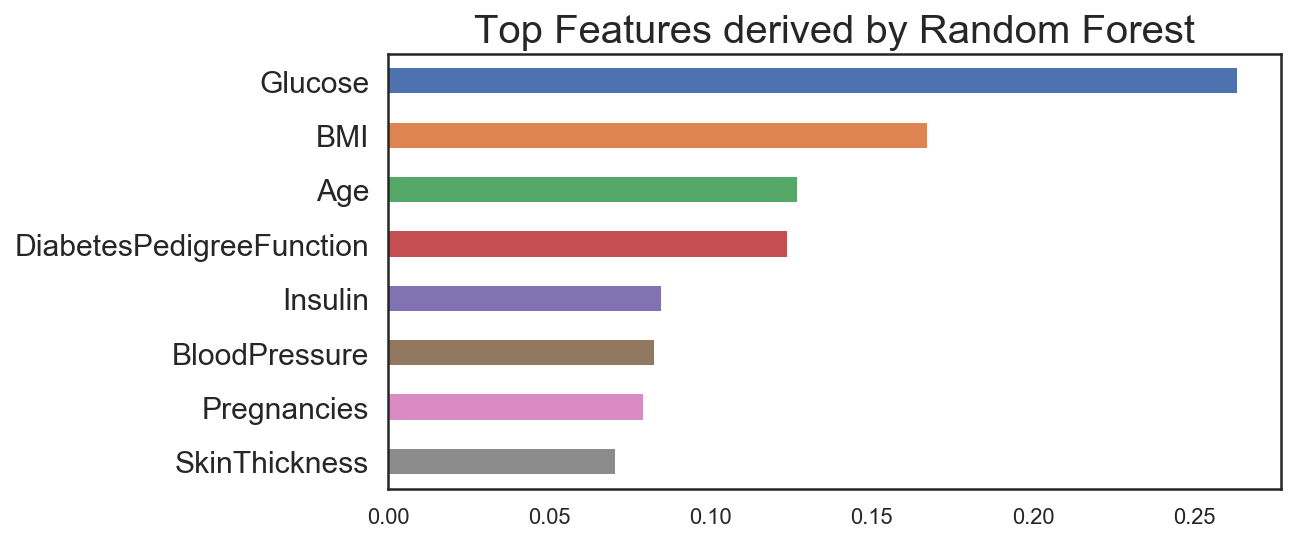

In [ ]:
## To look for top features using Random Forest
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Train model, note that NO scaling is required
rfc_model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(10)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

In [ ]:
# for linear data and model, p-value < 0.05 indicates a significant feature
import statsmodels.api as sm
X = sm.add_constant(X)  # need to add this to define the Intercept
# model / fit / summarize results
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     44.90
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           4.25e-59
Time:                        05:29:56   Log-Likelihood:                -371.86
No. Observations:                 768   AIC:                             761.7
Df Residuals:                     759   BIC:                             803.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0237      0.104     -9.841      0.000      -1.228      -0.819
Pregnancies                  0.0206      0.005      4.074      0.000       0.011       0.031
Glucose                      0.0065      0.001     11.967      0.000       0.005       0.008
BloodPressure               -0.0012      0.001     -0.924      0.356      -0.004       0.001
SkinThickness                0.0002      0.002      0.098      0.922      -0.004       0.004
Insulin                     -0.0002      0.000     -0.850      0.396      -0.001       0.000
BMI                          0.0145      0.003      5.574      0.000       0.009       0.020
DiabetesPedigreeFunction     0.1306      0.044      2.963      0.003       0.044       0.217
Age                          0.0021      0.002      1.355      0.176      -0.001       0.005
==============================================================================
Omnibus:                       33.680   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.901
Skew:                           0.322   Prob(JB):                     6.46e-06
Kurtosis:                       2.424   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Étape 4: Divisez les données au rapport 80:20 et effectuez la sélection du modèle
Spécifiez le paramètre de stratification pour effectuer un fractionnement afin que la proportion de valeurs dans l'ensemble de données fractionné produit ait la même proprotion que la colonne de stratification fournie.



Référence: http://www.kmdatascience.com/2017/07/k-folds-cross-validation-in-python.html

In [24]:


# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# # Data preprocessing, Scaling Numerical columns
# from sklearn.preprocessing import MinMaxScaler, StandardScaler   # not much difference in results
# # scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range = (0,1))
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [25]:
#SVM 

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

##Matrix de confusion

X dimension Predicted class
Y dimension True class

```markdown
Vrais Negatifs (VN) | 	Faux Positifs (FP)
Faux Negatifs (FP)  |  	Vrais Positifs (VP)
```




[[82 18]
 [21 33]]


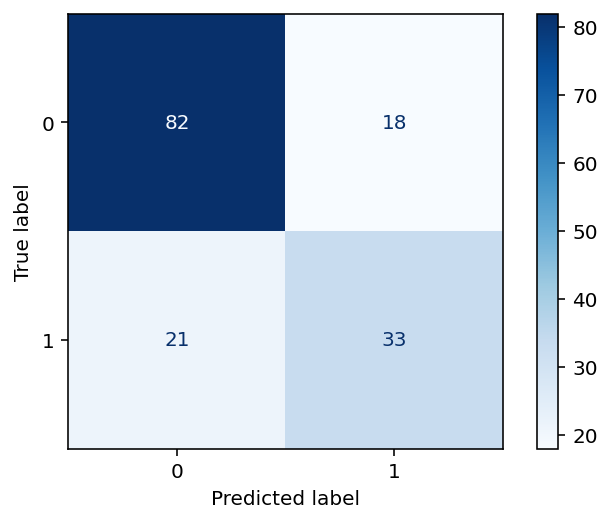

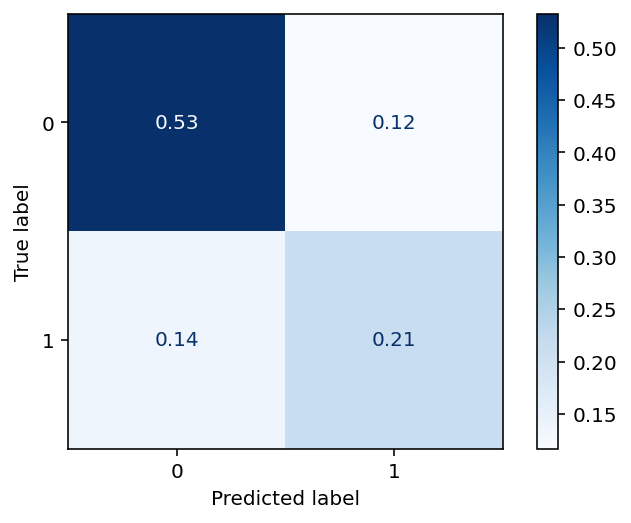

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize = 'all')  

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7467532467532467

In [28]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.743849525688475, 0.7467532467532467, 0.7450067174205105, None)

##Évaluation du modèle :
Quels sont les objectifs du modèle ?

Quelles erreurs le modèle peut-il faire ? Et lesquelles sont interdites ?

Exemples : 

1. Une banque qui veut détecter des fraudes voudra un modèle qui n’en laisse passer aucune. Quitte à avoir des suspicions, contacter le client et se tromper.
(Obj Minimiser les faux negatif, tolerance avec les faux positifs)

2. Une messagerie en revanche pourra laisser passer quelques spams mais devra éviter au maximum de classer en tant que spam un mail qui n’en n’est pas un.
(Obj Minimiser les faux positif, tolerance avec les faux negatifs)

3. Un algorithme de reconnaissance de cancer à partir de grains de beauté préférera se tromper et détecter un cancer. Le patient aura donc un examen supplémentaire ou un retrait du grain de beauté. C’est préférable au fait de laisser passer de véritables cancers.
(Obj Minimiser les faux negatif, tolerance avec les faux positifs)


##Measures de qualité
https://scikit-learn.org/stable/modules/model_evaluation.html

1. **Accuracy :**  Désigne la proportion des prédictions correctes effectuées par le modèle par rapport à toutes les prédictions. Cette métrique n’indique pas les forces et faiblesses de notre modèle, sourtout avec des données inbalanced. 

$Accuracy = \frac{Nombre de prédictions corrrectes} {Nombre total de prédictions}$

$Accuracy = \frac{VP+VN} {VP+VN+FP+FN}$

2. **Precision :** Quelle proportion d'identifications positives était effectivement correcte ?

$Precision = \frac{VP}{VP+FP}$

La précision permet de mesurer le coût des faux positifs, c’est-à-dire ceux détectés par erreur. Si l’on cherche à **limiter les faux positifs**, c’est cet indicateur que l’on va chercher à minimiser.


3. **Recall (Rappel, sensibilité )  :** Quelle proportion de résultats positifs réels a été identifiée correctement ?

$Recall = \frac{VP}{VP+FN}$

Ce calcul permet d’estimer combien de documents réellement positifs nous avons réussi à capturer et combien sont passés au travers des mailles du filet.
Il measure l'impact des faux negatifs


4.  **F1 Score :** Le F1-Score combine subtilement la précision et le rappel. Il est intéressant et plus intéressant que l’accuracy car le nombre de vrais négatifs (VN) n’est pas pris en compte. Et dans les situations d’imbalanced class , comme c'est le cas de cet exemple, nous avons une majorité de vrais négatifs qui faussent complètement notre perception de la performance de l’algorithme. 

$F1-Score = \frac{2 * Precision * Recall}{Precision+Recall}$

**Le F1-Score est donc à privilégier sur l’accuracy dans le cas d’une situation d’imbalanced classes.**

5. **Spécificité :** La spécificité mesure, à l’inverse que la sensibilité, la proportion d’éléments négatifs correctement identifiés.

$Spécificité = \frac{VN}{VN+FP}



##Threshold ou Seuil :##
 Le seuil représente la probabilité à partir de laquelle on considère que l’individu appartient à la class X.

 Imaginons un test pour détecter la grippe. Ce test se base uniquement sur la prise de température. Pour savoir si un individu est malade, on définit un seuil de température au-delà duquel l’individu est considéré malade.
Si seuil=40°C, il y a de fortes chances pour que le test fasse peu, voir aucune erreur en désignant des malades (fp=0). En revanche, il oubliera beaucoup de malades qui peuvent avoir une température de 39,5°C (fn=très élevé).

##Courbe ROC## 

Receiver operating characteristic,  est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

Taux de vrais positifs
Taux de faux positifs

Cette courbe sert à deux choses 

1.   **Comparer des modèles :** Il faut se baser sur l’aire sous la courbe (Area Under the Curve). Plus l’aire sous la courbe est grande, meilleur est notre modèle.
2.   **Choisir un seuil optimal :** Le seuil idéal est le meilleur compromis entre sensibilité et spécificité. Correspond au point à la fois le plus proche de l’idéal (1,1) et à la fois le plus loin de la diagonale.







[0.   0.18 1.  ]
[0.         0.61111111 1.        ]
[2 1 0]


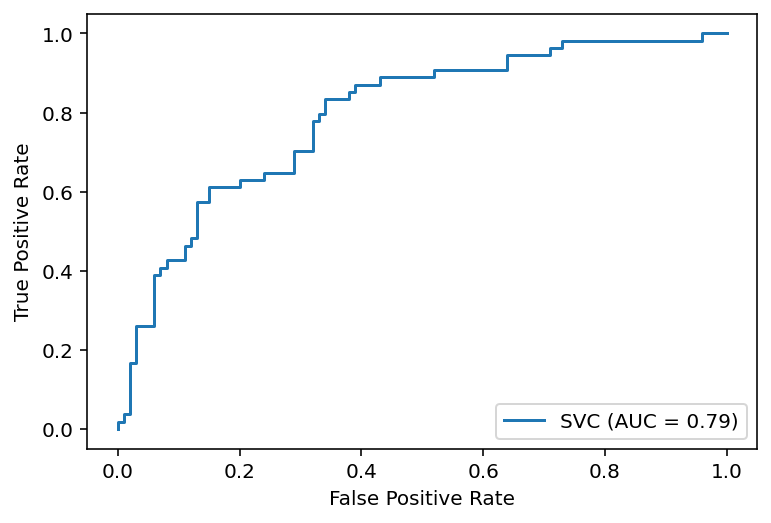

In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                                   

##Random Forest : 
Repeter l'analyse avec le classificateur Random Forest?

accuracy =  0.7142857142857143


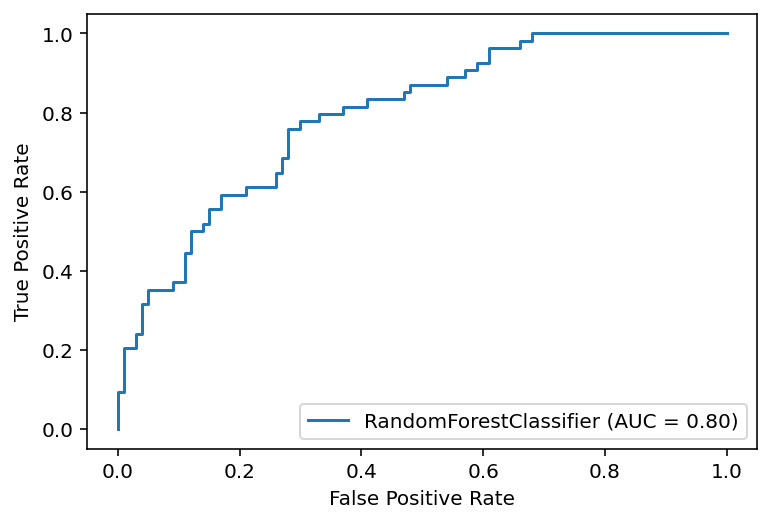

precision_recall_fscore = (0.7069160997732427, 0.7142857142857143, 0.6854244395794148, None)


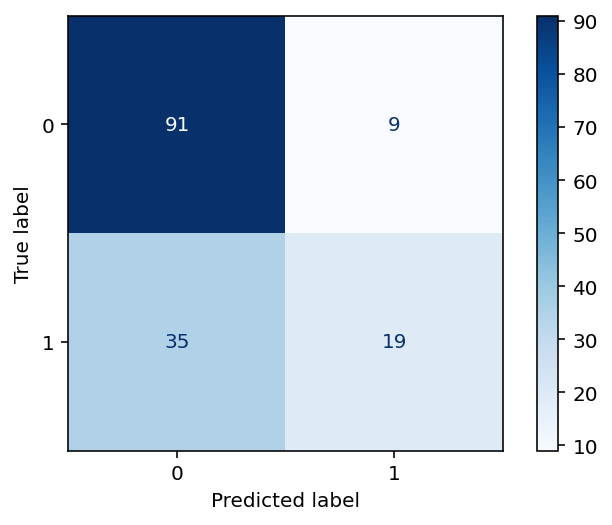

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=SEED)
clf.fit(X, y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy = ',accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues') 
print ('precision_recall_fscore =', precision_recall_fscore_support(y_test, y_pred, average='weighted') )




### Cross Validation
Use StratifiedKFold, especially if target class is imbalance

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [21]:
## Baseline model performance evaluation
# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [0]       })   # timetaken: to be used for comparison later
    return df_model

# to evaluate baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svc = SVC()
linearsvc = LinearSVC()

# to concat all models
df_models = pd.concat([baseline_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB'),
                       baseline_report(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB'),
                       baseline_report(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB'),
                       baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       baseline_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree'),
                       baseline_report(randomforest, X_train, X_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svc, X_train, X_test, y_train, y_test, 'SVC'),
                       baseline_report(linearsvc, X_train, X_test, y_train, y_test, 'LinearSVC')
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

model  accuracy  precision  ...    rocauc    logloss  timetaken
0          GaussianNB  0.770385   0.689583  ...  0.823728  10.092635          0
1         BernoulliNB  0.644969   0.460000  ...  0.490895  12.111025          0
2       MultinomialNB  0.600973   0.433162  ...  0.542553  15.026771          0
3  LogisticRegression  0.784953   0.751597  ...  0.827998   9.868315          0
4                 KNN  0.731307   0.640938  ...  0.754465  11.438286          0
5        DecisionTree  0.682394   0.550972  ...  0.654918   8.746895          0
6        RandomForest  0.763854   0.700828  ...  0.812173   8.298355          0
7                 SVC  0.763868   0.744249  ...  0.817481   9.644006          0
8           LinearSVC  0.607597   0.249328  ...  0.714968   9.644105          0

[9 rows x 8 columns]

#### Baseline model (without removing zeros) :

![image.png](attachment:image.png)

#### Baseline model (zeros removed) :

![image.png](attachment:image.png)

### Step 5: Optimise model: hyperparameter tuning

In [33]:
def model_report(model, X_train, X_test, y_train, y_test, model_name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(model_name, 'Log-loss: {:.4f}'.format(logloss))

    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [1000]       })   # timetaken for comparison later
    return df_model

In [34]:
print('\n"""""" GaussianNB """"""')
time1 = time.time()
gnb = GaussianNB()
model1 = model_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
model1.timetaken[0] = time.time() - time1


print('\n"""""" BernoulliNB """"""')
time1 = time.time()
bnb = BernoulliNB()
model2 = model_report(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
model2.timetaken[0] = time.time() - time1


print('\n"""""" MultinomialNB """"""')
time1 = time.time()
mnb = MultinomialNB()
model3 = model_report(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
model3.timetaken[0] = time.time() - time1


"""""" GaussianNB """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5192,  0.100->0.5960,  0.200->0.6316,  0.300->0.6452,  0.400->0.6167,  0.500->0.6087,  0.600->0.5962,  0.700->0.5859,  0.800->0.5000,  0.900->0.4359,  1.000->0.1034,  
Looping decimal place 2
0.200->0.6316,  0.210->0.6260,  0.220->0.6202,  0.230->0.6250,  0.240->0.6250,  0.250->0.6299,  0.260->0.6349,  0.270->0.6400,  0.280->0.6452,  0.290->0.6452,  0.300->0.6452,  0.310->0.6504,  0.320->0.6504,  0.330->0.6167,  0.340->0.6167,  0.350->0.6167,  0.360->0.6167,  0.370->0.6167,  0.380->0.6167,  0.390->0.6167,  0.400->0.6167,  
Looping decimal place 3
0.300->0.6452,  0.301->0.6452,  0.302->0.6452,  0.303->0.6452,  0.304->0.6452,  0.305->0.6504,  0.306->0.6504,  0.307->0.6504,  0.308->0.6504,  0.309->0.6504,  0.310->0.6504,  0.311->0.6504,  0.312->0.6504,  0.313->0.6504,  0.314->0.6504,  0.315->0.6504,  0.316->0.6504,  0.317->0.6504,  0.318->0.

ValueError: ignored

In [ ]:
# Optimal threshold 0.207
# Precision: 0.5952,   Recall: 0.9091,   F1 Score: 0.7194
# GaussianNB confusion matrix: 
#  [[65 34]
#  [ 5 50]]
# GaussianNB AUC: 0.8325
# GaussianNB Log-loss: 0.5727

In [ ]:
print('\n"""""" LogisticRegression """"""')
time1 = time.time()
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

logit = LogisticRegression(C = optimal_c)
model4 = model_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression')
model4.timetaken[0] = time.time() - time1

In [ ]:
print('\n"""""" KNN """""" ')
time1 = time.time()
print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
k_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
optimal_k = k_scores.index(max(k_scores))+1   # index 0 is for k=1
print('optimal value of K =', optimal_k)

knn = KNeighborsClassifier(n_neighbors = optimal_k)
model5 = model_report(knn, X_train, X_test, y_train, y_test, 'KNN')
model5.timetaken[0] = time.time() - time1

print('\nCompare with KNN classification_report (same as default threshold 0.50)')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

In [ ]:
print('\n"""""" DecisionTreeClassifier """"""')
time1 = time.time()
print('\nSearch for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
d_scores = []
for d in range(2, 11):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='f1').mean()
    d_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
optimal_d = d_scores.index(max(d_scores))+2   # index 0 is for d=2
print('optimal max_depth =', optimal_d)

decisiontree = DecisionTreeClassifier(max_depth=optimal_d)
model6 = model_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree')
model6.timetaken[0] = time.time() - time1
# Note: results keep changing in each run

In [ ]:
print('\n"""""" RandomForestClassifier """""" (quite slow)')
time1 = time.time()
print('\nSearch for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
score_list = []
n_list = []
for n in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    randomforest = RandomForestClassifier(n_estimators=n)
    cvs = (cross_val_score(randomforest, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    n_list.append(n)
    print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
print('optimal F1 score = {:.4f}'.format(max(score_list)))
optimal_n = int(n_list[score_list.index(max(score_list))])
print('optimal n_estimators = {:.0f}'.format(optimal_n))

randomforest = RandomForestClassifier(n_estimators=optimal_n)
model7 = model_report(randomforest, X_train, X_test, y_train, y_test, 'RandomForest')
model7.timetaken[0] = time.time() - time1
# Note: results keep changing in each run

In [ ]:
# Optimal threshold 0.270
# Precision: 0.5682,   Recall: 0.9091,   F1 Score: 0.6993
# RandomForest confusion matrix: 
#  [[61 38]
#  [ 5 50]]
# RandomForest AUC: 0.8423
# RandomForest Log-loss: 0.4684

In [ ]:
print('\n"""""" SVC """"""')
time1 = time.time()
svc = SVC(gamma='scale', probability=True)
model8 = model_report(svc, X_train, X_test, y_train, y_test, 'SVC')
model8.timetaken[0] = time.time() - time1

In [ ]:
print('\n"""""" LinearSVC """"""')
time1 = time.time()
linearsvc = LinearSVC()
# model9 = model_report(linearsvc, X_train, X_test, y_train, y_test, 'LinearSVC')   # model has no attribute 'predict_proba'

linearsvc.fit(X_train, y_train)
print('LinearSVC accuracy score is')
print('Training: {:.2f}%'.format(100*linearsvc.score(X_train, y_train)))  # score uses accuracy
accuracy      = linearsvc.score(X_test, y_test)
print('Test set: {:.2f}%'.format(100*accuracy))

y_pred = linearsvc.predict(X_test)
print(classification_report(y_test, y_pred))
print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))

precision    = precision_score(y_test, y_pred)
recall       = recall_score(y_test, y_pred)
f1score      = f1_score(y_test, y_pred) 
rocauc       = roc_auc_score(y_test, y_pred)
logloss      = log_loss(y_test, y_pred)
print('LinearSVC AUC: {:.4f}'.format(rocauc))
print('LinearSVC Log-loss: {:.4f}'.format(logloss))

model9 = pd.DataFrame({'model'        : ['LinearSVC'],
                       'accuracy'     : [accuracy],
                       'precision'    : [precision],
                       'recall'       : [recall],
                       'f1score'      : [f1score],
                       'rocauc'       : [rocauc],
                       'logloss'      : [logloss],
                       'timetaken'    : [time.time() - time1]       })
# Note: results keep changing in each run

### Compiling the results of all tuned models

In [ ]:
# concat all models
df_models_tuned = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8,model9],axis = 0).reset_index()
df_models_tuned.drop('index', axis=1, inplace=True)
df_models_tuned

model  accuracy  precision    recall   f1score    rocauc  \
0          GaussianNB  0.753247   0.595238  0.909091  0.719424  0.832507   
1         BernoulliNB  0.642857   0.357143  1.000000  0.526316  0.487879   
2       MultinomialNB  0.681818   0.569231  0.672727  0.616667  0.693848   
3  LogisticRegression  0.753247   0.820513  0.581818  0.680851  0.821671   
4                 KNN  0.701299   0.489362  0.836364  0.617450  0.737649   
5        DecisionTree  0.727273   0.584416  0.818182  0.681818  0.823140   
6        RandomForest  0.753247   0.608108  0.818182  0.697674  0.834894   
7                 SVC  0.727273   0.589041  0.781818  0.671875  0.765289   
8           LinearSVC  0.714286   0.789474  0.272727  0.405405  0.616162   

    logloss  timetaken  
0  0.572744   0.000000  
1  0.652647   0.000000  
2  1.089210   0.000000  
3  0.492124  10.000000  
4  1.413646   1.000000  
5  1.102698   0.000000  
6  0.481482  43.000000  
7  0.545245   0.000000  
8  9.868243   0.041888

In [ ]:
df_models   # compare with baseline results before tuning

model  accuracy  precision    recall   f1score    rocauc  \
0          GaussianNB  0.753247   0.649123  0.672727  0.660714  0.735354   
1         BernoulliNB  0.642857   0.000000  0.000000  0.000000  0.500000   
2       MultinomialNB  0.681818   0.565217  0.472727  0.514851  0.635354   
3  LogisticRegression  0.779221   0.733333  0.600000  0.660000  0.739394   
4                 KNN  0.675325   0.539683  0.618182  0.576271  0.662626   
5        DecisionTree  0.707792   0.589286  0.600000  0.594595  0.683838   
6        RandomForest  0.733766   0.652174  0.545455  0.594059  0.691919   
7                 SVC  0.642857   0.000000  0.000000  0.000000  0.500000   
8           LinearSVC  0.642857   0.000000  0.000000  0.000000  0.500000   

     logloss  timetaken  
0   8.522659          0  
1  12.335277          0  
2  10.989715          0  
3   7.625506          0  
4  11.214039          0  
5  10.092619          0  
6   9.195472          0  
7  12.335277          0  
8  12.335277          0

In [ ]:
# initialise an empty df for comparison: 1 = improved, 0 = no improvement
df1 = pd.DataFrame({'model': [0]*9,'accuracy': [0]*9,'precision': [0]*9,'recall': [0]*9,'f1score': [0]*9,'rocauc': [0]*9,'logloss': [0]*9,'timetaken': [0]*9})
df1.model = df_models.model
for i in range(1,6):
    for j in range(9):
        if df_models_tuned[df_models_tuned.columns[i]][j] > df_models[df_models.columns[i]][j]:
            df1[df1.columns[i]][j] = 1
for i in range(6,8):
    for j in range(9):
        if df_models_tuned[df_models_tuned.columns[i]][j] < df_models[df_models.columns[i]][j]:
            df1[df1.columns[i]][j] = 1
df1   # Note: F1-Score has improved for all models after tuning the threshold and other hyperparameters

model  accuracy  precision  recall  f1score  rocauc  logloss  \
0          GaussianNB         0          0       1        1       1        1   
1         BernoulliNB         0          1       1        1       0        1   
2       MultinomialNB         0          1       1        1       1        1   
3  LogisticRegression         0          1       0        1       1        1   
4                 KNN         1          0       1        1       1        1   
5        DecisionTree         1          0       1        1       1        1   
6        RandomForest         1          0       1        1       1        1   
7                 SVC         1          1       1        1       1        1   
8           LinearSVC         1          1       1        1       1        1   

   timetaken  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0

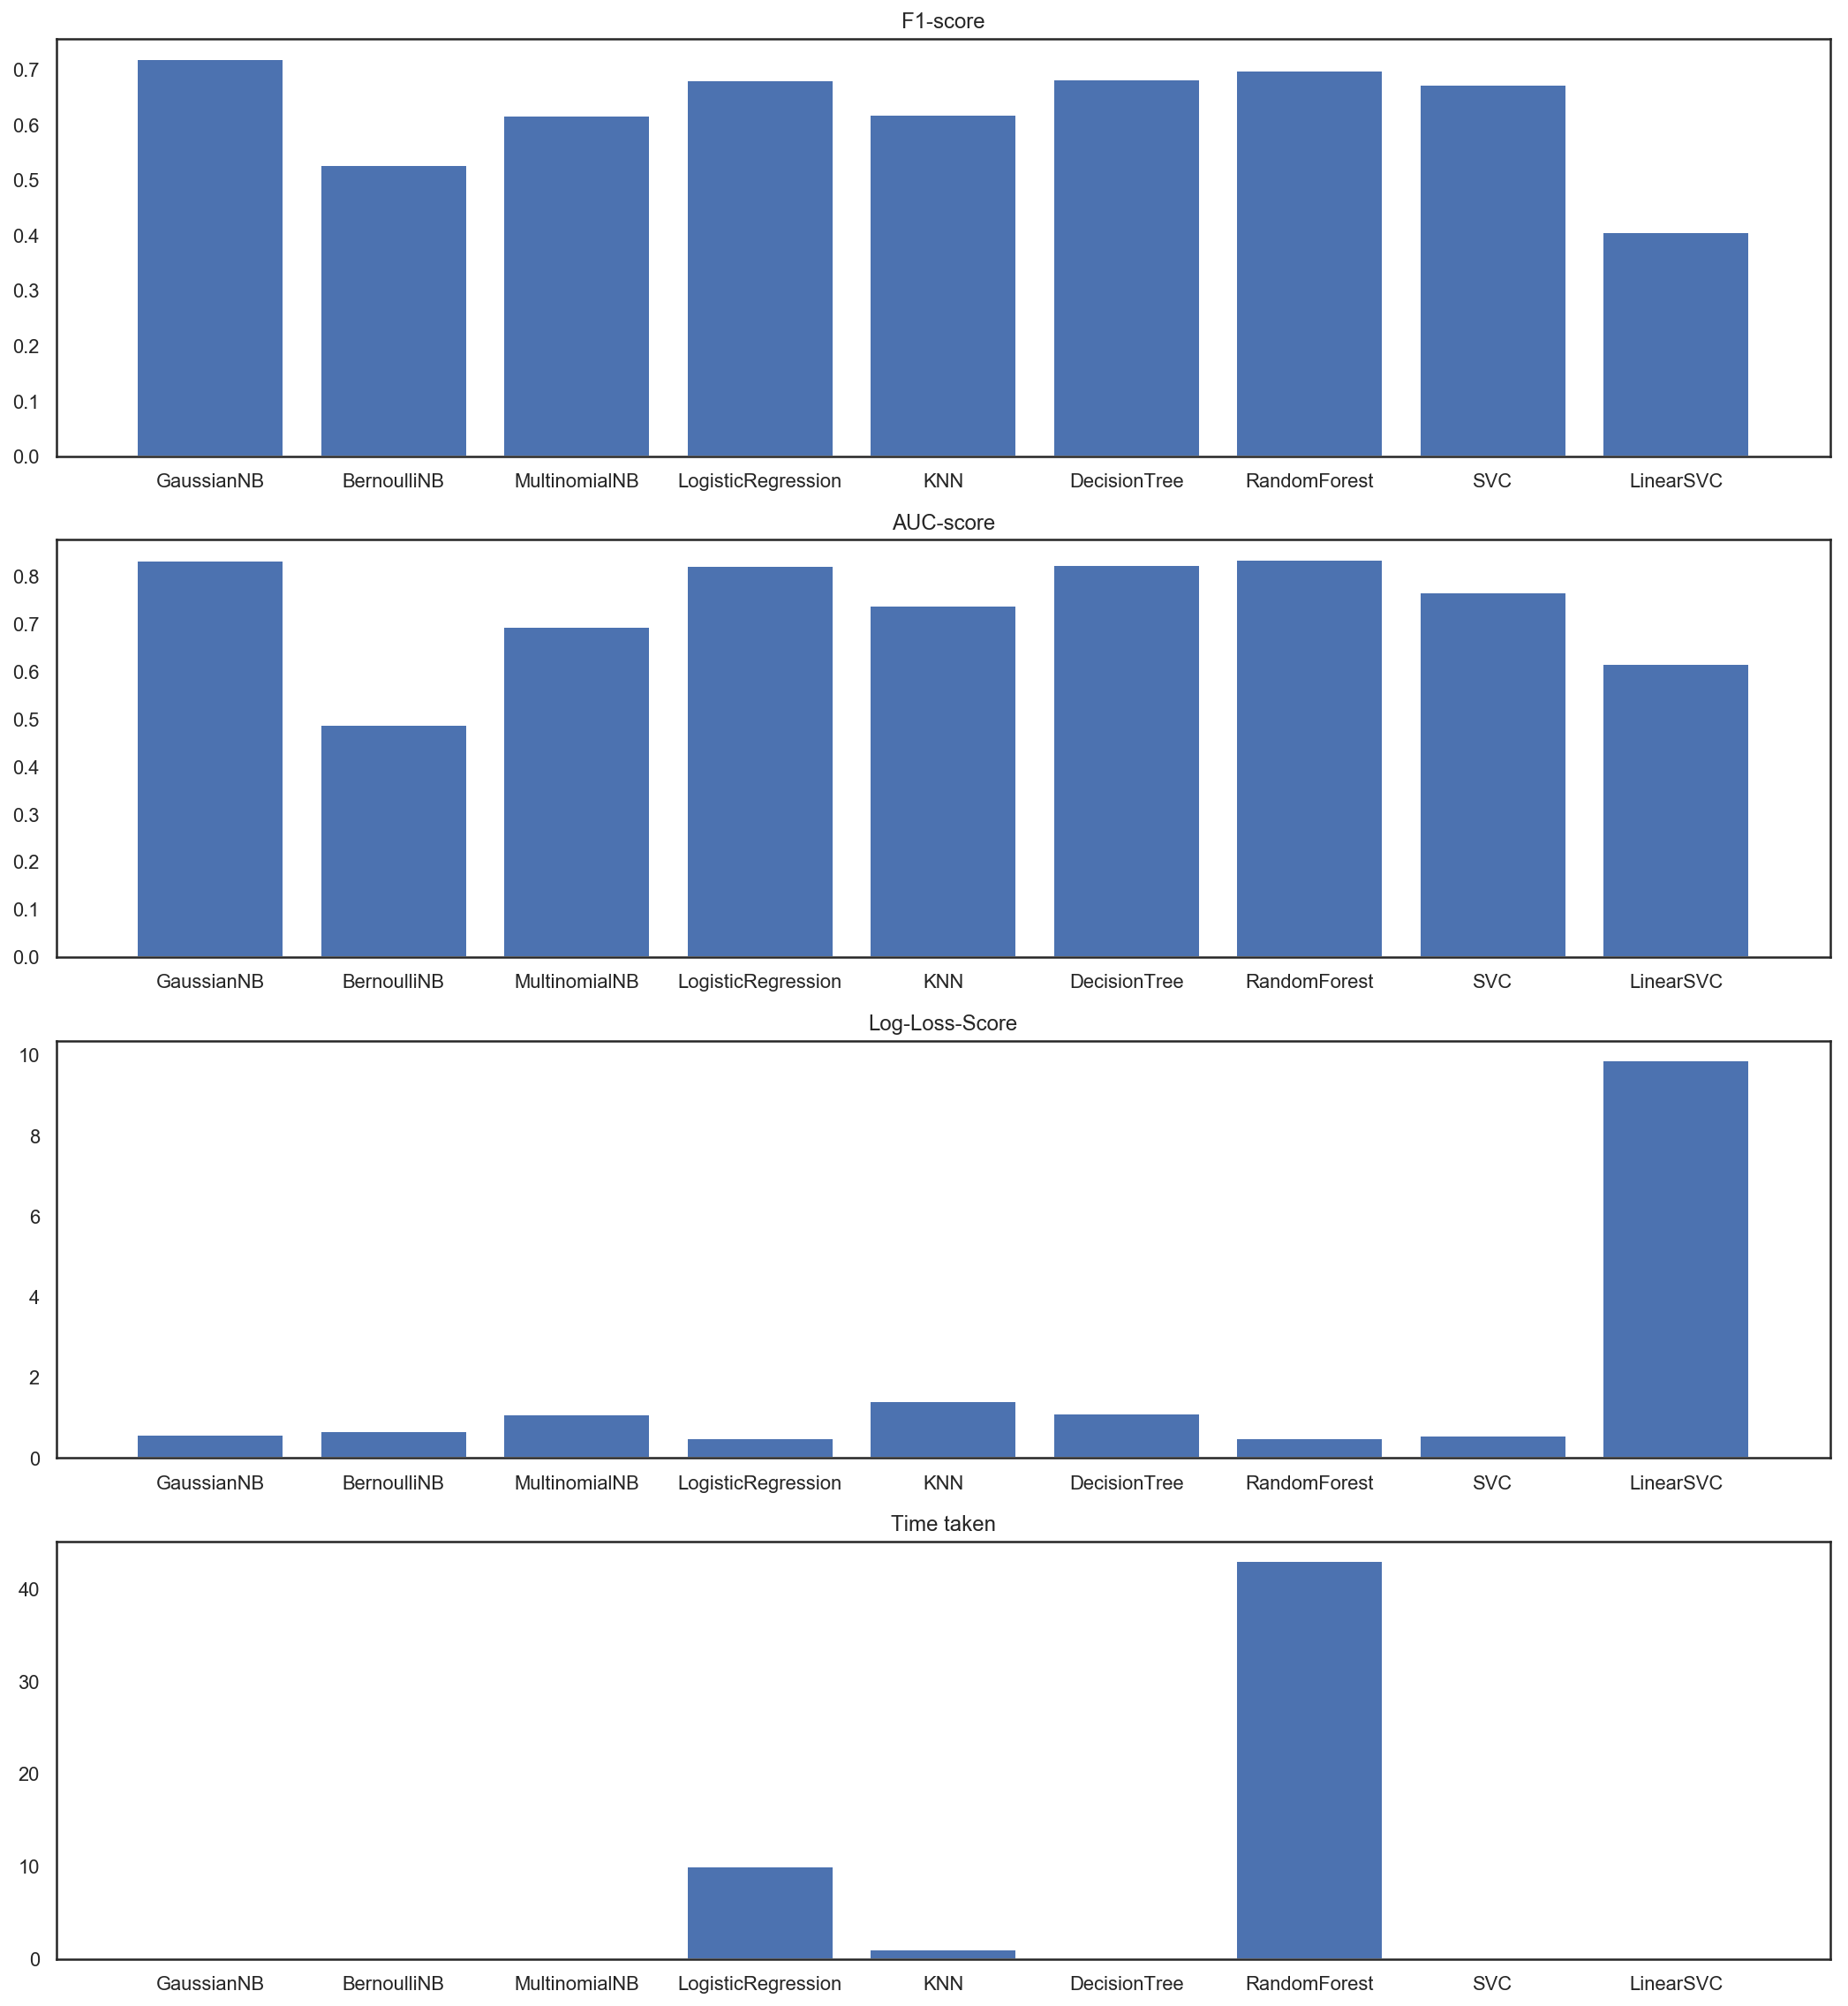

In [ ]:
## plot the performance metric scores
fig, ax = plt.subplots(4, 1, figsize=(18, 20))

ax[0].bar(df_models_tuned.model, df_models_tuned.f1score)
ax[0].set_title('F1-score')

ax[1].bar(df_models_tuned.model, df_models_tuned.rocauc)
ax[1].set_title('AUC-score')

ax[2].bar(df_models_tuned.model, df_models_tuned.logloss)
ax[2].set_title('Log-Loss-Score')

ax[3].bar(df_models_tuned.model, df_models_tuned.timetaken)
ax[3].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

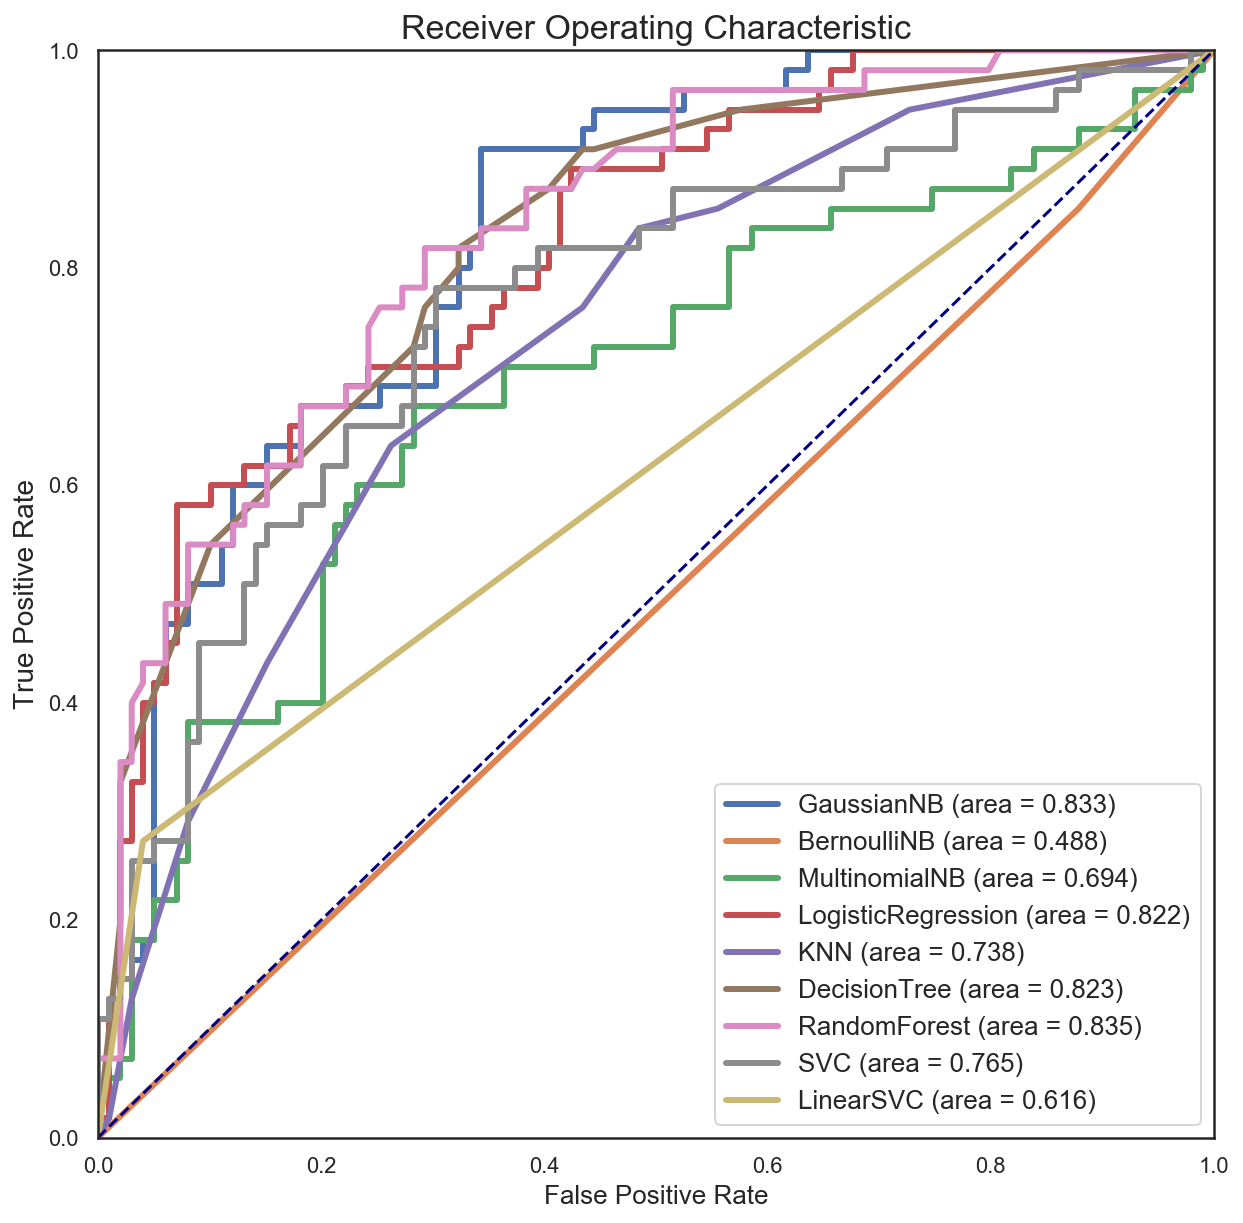

In [ ]:
# plot the ROC curves
plt.figure(figsize=(10,10))

model_name = [gnb, bnb, mnb, logit, knn, decisiontree, randomforest, svc, linearsvc]

for i in range(8):
    y_pred = model_name[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=df_models_tuned.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))

y_pred = linearsvc.predict(X_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, lw=3, label='LinearSVC (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [ ]:
# see how model confusion matrix varies with threshold
bestmodel = gnb

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no diabetes', 'diabetes'],
           yticklabels=['no diabetes', 'diabetes']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

# Let's see how our confusion matrix changes with changes to the cutoff! 
from ipywidgets import interactive, FloatSlider
# bestmodel = LogisticRegression(C = optimal_c)
# bestmodel.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

### The winning model is:

In [ ]:
# GaussianNB AUC: 0.8325
# Optimal threshold 0.207
# Precision: 0.5952,   Recall: 0.9091,   F1 Score: 0.7194
# GaussianNB confusion matrix: 
#  [[65 34]
#  [ 5 50]]

![image.png](attachment:image.png)

In [ ]:
# RandomForest AUC: 0.8369
# Optimal threshold 0.447
# Precision: 0.6418,   Recall: 0.7818,   F1 Score: 0.7049
# RandomForest confusion matrix: 
#  [[75 24]
#  [12 43]]

![image.png](attachment:image.png)

In [ ]:
# Difference between roc_auc_score(y_test, y_pred) and auc(fpr, tpr)
y_pred = gnb.predict(X_test)
model_roc_auc = roc_auc_score(y_test, y_pred)   # this is AUC score when threshold is default 0.5
print('gnb', 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 

y_pred = gnb.predict_proba(X_test)[:,1]>0.5    # predict_proba to adjust threshold to 0.5, same results
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
model_auc = auc(fpr, tpr)
print('gnb', 'AUC: {:.4f}'.format(model_auc))

y_pred = gnb.predict_proba(X_test)[:,1]   # use this for optimal threshold after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
model_auc = auc(fpr, tpr)
print('gnb', 'AUC: {:.4f}'.format(model_auc))

gnb roc_auc_score: 0.7354
gnb AUC: 0.7354
gnb AUC: 0.8325


###  Appendix: Use GridSearchCV to tune the model, eg. Logistic Regression
For most algorithms, there are parameters to tune to model the data better. One approach is to use grid search to find a suitable parameter that builds an optimal model.

In [ ]:
# pass in parameters of all these values in the grids, see which gives the best score.
param_grid = {'C': [0.01, 0.1, 1, 10, 20]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    param_grid, cv=5, scoring='f1') # cv=5 refers to cross validation in the training dataset

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid.best_score_))   # scoring='f1'; or default using accuracy
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

#make prediction
lr = grid.best_estimator_
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))

Best cross-validation score: 0.624
Best parameters:  {'C': 10}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Testing metrics after grid search
Accuracy 0.7597402597402597
Precision 0.6607142857142857
Recall 0.6727272727272727


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Appendix: To handle imbalance data
This two-class dataset seems imbalanced (65% vs 35%). As a result, there is a possibility that one class is over-represented and the model built might be biased towards to majority. I have tried to solve this by oversampling the smaller class but there was no improvement. F1-score dropped from 0.66 to 0.63

In [ ]:
# baseline model performance (before  oversampling)
print('X_train.shape:', X_train.shape)
print(pd.value_counts(pd.Series(y_train)))
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', gnb.score(X_test, y_test))   # same result (.score uses accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

X_train.shape: (614, 8)
0    401
1    213
Name: Outcome, dtype: int64
Model accuracy is 0.7532467532467533
Model accuracy is 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

   micro avg       0.75      0.75      0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[[79 20]
 [18 37]]


In [ ]:
# Handling imbalance data - Rerunning above with resampled data - using oversampling
# create fake sample data into the imbalanced side to balance it out.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = SEED)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel())

print('X_train_sm.shape:', X_train_sm.shape)
print(pd.value_counts(pd.Series(y_train_sm)))

gnb_sm = gnb.fit(X_train_sm, y_train_sm)
y_pred = gnb_sm.predict(X_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', gnb.score(X_test, y_test))   # same results (.score uses accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

X_train_sm.shape: (802, 8)
1    401
0    401
dtype: int64
Model accuracy is 0.7207792207792207
Model accuracy is 0.7207792207792207
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

   micro avg       0.72      0.72      0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

[[74 25]
 [18 37]]
